In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned.csv')

In [25]:
df.head(15)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73
5,0,2,1,2,31,3.0,7,0,0,85,0,3.0,170
6,4,2,0,1,31,3.0,5,0,0,59,0,3.0,59
7,4,3,1,1,33,3.0,6,0,0,63,0,3.0,63
8,0,2,1,1,28,4.0,5,0,0,83,0,4.0,83
9,7,3,1,1,32,5.0,5,1,0,54,0,6.0,54


In [5]:
df.shape

(54808, 13)

In [7]:
X = df.drop(['is_promoted'], axis = 1)
y = df['is_promoted']

In [24]:
y.unique()

array([0, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test1, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [9]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

## Decision Tree

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(x_test1)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test1,y_test))

Training Accuracy : 0.9934087488026274
Testing Accuracy : 0.896551724137931


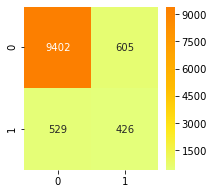

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [21]:

prediction = model.predict(np.array([[6, #department code
                                      2, #masters degree
                                      1, #male
                                      10, #1 training
                                      35, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      8, #KPIs met >80%
                                      10, #awards won
                                      90, #avg training score
                                      30, #sum of metric 
                                      100 #total score
                                     ]]))

In [27]:

prediction1 = model.predict(np.array([[7, #department code
                                      2, #masters degree
                                      0, #male
                                      1, #1 training
                                      35, #35 years old
                                      5, #previous year rating
                                      3, #length of service
                                      1, #KPIs met >80%
                                      50, #awards won
                                      1, #avg training score
                                      6, #sum of metric 
                                      50 #total score
                                     ]]))

In [28]:
if prediction1 == 1:
    print("employee promoted")
else:
    print("woops! employee not promoted")

employee promoted


In [26]:
df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73
